# Ämnesordsindexering och datakonvertering

[Björn Ekström](mailto:bjorn.ekstrom@hb.se)

I den här övningsuppgiften ska vi ämnesordsindexera ett antal böcker. Detta görs i ett standardiserat dataformat, varefter vi konverterar detta dataformat till två andra sådana.

Övningsuppgiften syftar till att låta dig öva på ämnesordsindexering i teori och praktik. Uppgiften syftar också till att du ska bekanta dig med att skriva, läsa och konvertera strukturerad data enligt etablerade regler för giltig data.

I uppgiften kommer vi att arbeta med kommaseparerade (CSV) filer. CSV-filer heter som de gör eftersom de är rena textfiler där data separeras genom kommatecken. Den översta raden läses automatiskt som en rubrik, varigenom nästkommande rader utgör de data som rubrikerna hänvisas till. Man kan tänka på CSV-filer som lättviktiga Excelfiler, där data läggs i och separeras genom kommatecken, snarare än i celler.

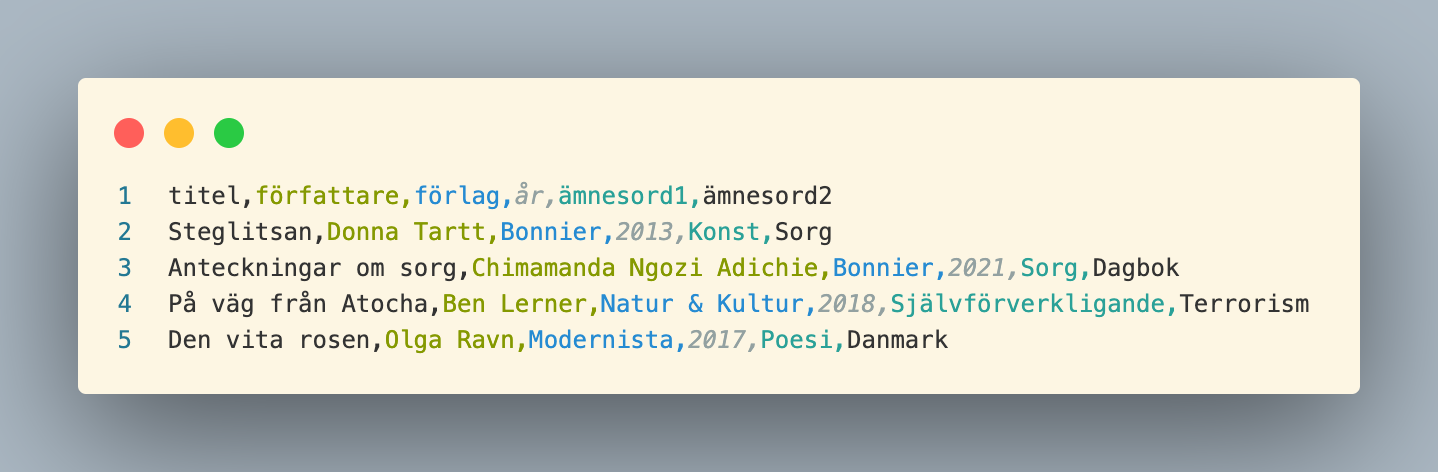

Figur 1. En CSV-fil.

## Förberedelser

För att skriva CSV-filer behöver du ett textredigeringsprogram.

* Om du har en PC så kan du skriva i programmet Anteckningar som redan finns på din dator.

* Om du har en Mac så kan du skriva i programmet Textredigerare som redan finns på din dator.

* Om du har en Chromebook så kan du skriva i [programmet Text som går att hämta gratis här](https://chrome.google.com/webstore/detail/text/mmfbcljfglbokpmkimbfghdkjmjhdgbg).

Om du har en PC eller en Mac kan också välja att ladda ner och installera en dedikerad textredigerare, t ex [Visual Studio Code](https://code.visualstudio.com/), [Atom](https://atom.io/) eller [Sublime Text](https://www.sublimetext.com/3).

## Skapa en CSV-fil med en ämnesordsindexerad bokkatalog

Börja med att skapa en CSV-fil i en textredigerare med en förteckning över ett antal böcker. Välj några böcker som du känner väl. Hitta författare-, förlags- och årtalsinformation ifrån exempelvis [Libris](https://libris.kb.se). 

Ämnesordsindexera böckerna i en textfil (jämför med Figur 1). Ta för enkelhets skull [Kungliga bibliotekets 20%-regel](https://metadatabyran.kb.se/amnesord-och-genre-form/svenska-amnesord/principer-for-amnesordsindexering#h-Antalamnesord) som allmän guide.

Du kan söka upp passande ämnesord från [Svenska ämnesord](https://id.kb.se/find?q=*&inScheme.%40id=https%3A%2F%2Fid.kb.se%2Fterm%2Fsao).

Spara filen någonstans på din dator med filnamnet `katalog.csv`. Tänk på att spara din fil med filändelsen `.csv`.

## Importera mjukvarubibliotek

För att kunna läsa in och konvertera data behöver vi importera ett antal mjukvarubibliotek. De mjukvarubibliotek vi kommer använda är `pandas` för att läsa CSV-filer, `json` för att läsa och skriva metadatastandarden JavaScript Object Notation (JSON) och `json2xml` för at konvertera JSON till eXtensible Markup Language (XML). Vi kommer också att använda `google.colab` och `os` för att läsa och skriva filer till disk.

In [ ]:
!pip install pandas
import pandas as pd

import json

!pip install json2xml
from json2xml import json2xml
from json2xml.utils import readfromurl, readfromstring, readfromjson

import os

## Ladda upp din CSV-fil

Kör kodcellen nedan och klicka sedan på Browse-knappen för att ladda upp din CSV-fil.

In [ ]:
from google.colab import files

uploaded = files.upload()

## Läs in CSV som dataframe

Genom att köra kodcellen nedan läses din CSV-fil in till en dataframe, en tabell för datahantering.

In [ ]:
csv_katalog = pd.read_csv("katalog.csv")

csv_katalog.head()

Om en tabell visas ovan så innebär det att din CSV-fil är valid. Det betyder i sin tur att datorn förstår och kan läsa din bokkatalog med tillhörande ämnesord. Det är ett sätt att representera ämnesordsbeskrivning i data.

## Konvertera dataframe till JSON

Nu ska vi övergå till att konvertera dataframe:n till ett annat standardiserat metadataramverk, nämligen JSON. Detta går att göra direkt genom att köra kodcellen nedan.

In [ ]:
konverterad_json = csv_katalog.to_json(orient = "index")

print(konverterad_json)

Även om en dator skulle förstå det som visas ovan så är det hela tyvärr mer eller mindre oläsbart för en människa. Vi ser till att vår metadata görs mer läsbar innan vi sparar den till fil.

## Gör JSON tjusigare

Som tur är kan vi göra vår JSON tjusig, genom så kallad *pretty printing*. Vi kör kodcellen nedan och får en helt annan output med tillhörande indrag, där man tydligt ser rubriker och värden.

In [ ]:
json_katalog = json.loads(konverterad_json)

lasbar_json_katalog = json.dumps(json_katalog, indent = 4, ensure_ascii=False)

print(lasbar_json_katalog)

Noter att det är samma data som tidigare, men den framställs på ett annat vis. I JSON återkommer varje titel här som en post, där samma rubriker återfinns gång på gång.

## Spara din JSON-fil

Spara JSON-filen genom att köra kodcellen nedan.

In [ ]:
with open('json-katalog.json', 'w') as f:
  f.write(lasbar_json_katalog)

files.download('json-katalog.json')

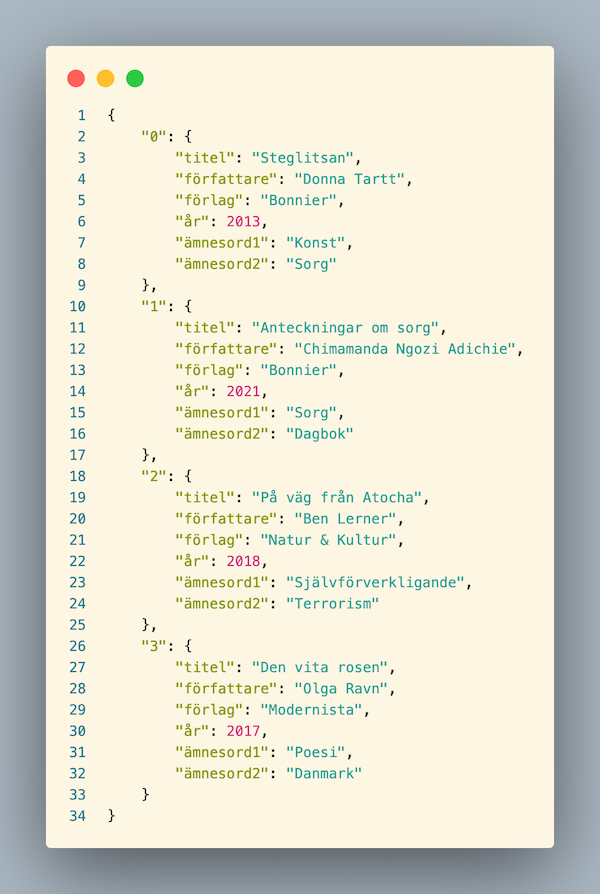

Figur 2. Tjusig JSON.

## Konvertera JSON till XML

Ytterligare ett etablerat och standardiserat metadataformat är XML, vilket vi nu ska konvertera vår bokkatalog till. Detta görs enkelt genom att köra kodcellen nedan.

In [ ]:
xml_katalog = readfromstring(lasbar_json_katalog)

xml = json2xml.Json2xml(xml_katalog).to_xml()

print(xml)

XML-versionen av din bokkatalog liknar JSON sett till att den också utgör poster för varje bok, men skiljer sig genom att den använder element (märken omgärdade av `<`- och `>`-tecken istället för hakparenteser och semikolon.)

## Spara din XML-fil

Spara JSON-filen genom att köra kodcellen nedan.

In [ ]:
resultat_xml = str(xml)

with open('xml-katalog.xml', 'w') as f:
  f.write(resultat_xml)

files.download('xml-katalog.xml')

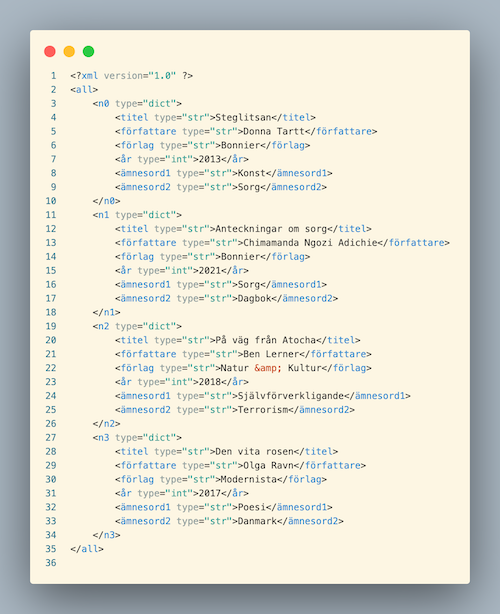

Figur 3. XML-bokkatalog.

# Avslutning

Efter att ha genomfört den här uppgiften har du gjort följande:

* Ämnesordsindexerat ett antal böcker.
* Skrivit en giltig kommaseparerad fil där de ämnesordsindexerade böckerna, med tillhörande metadata, ryms.
* Kört Python-kod och importerat relevanta kodbibliotek.
* Konverterat din bokkatalog till JSON.
* Konverterat din bokkatalog till XML.

På kunskapsorganisationsspråk har du använt data science-verktyg för att skriva och hantera. Du har också konverterat dessa data mellan olika format samtidigt som du tränat dig i att ämnesordsindexera manifestationer.

Avslutningsvis kan du fundera kring dessa frågor:

* Hur väljer du passande ämnesord?
* Hur gör du om du vill lägga till ett tredje och fjärde ämnesord per bok?
* Vilket metadataformat tycker du var enklast att läsa?
* Vilket metadataformat tror du är enklast att skriva?
* Vilket metadataformat tror du är enklast att justera och hålla uppdaterat?

Om du vill läsa mer om de tre metadataformaten, se 

* [CSV on the Web: A Primer](https://www.w3.org/TR/tabular-data-primer/), 
* [Introducing JSON](https://www.json.org/json-en.html) samt 
* [W3School's XML Tutorial](https://www.w3schools.com/xml).